In [14]:
import os

os.chdir("E:/235724_한국 부동산 데이터 시각화 경진대회_data")
print(os.getcwd())

E:\235724_한국 부동산 데이터 시각화 경진대회_data


In [23]:
import pandas as pd
import matplotlib as mpl
# 폰트 업데이트 하는 코드 -> 있어야 한글 쓸 수 있음 
mpl.font_manager._rebuild()
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

<문제정의>

# 갭투자

시세차익을 목적으로 주택 매매가와 전세가의 차액이 적은 집을 고르는 투자 방식

### <span style="color: red">갭투자하기 좋은 곳 == 매매가와 전세가의 차액이 적고 주택가격이 많이 오른 곳</span>




In [4]:
year_price=pd.read_csv('주택전세가격지수(KB).csv')
year_price

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
...,...,...,...,...,...,...,...
418,2020-11-01,104.886,102.823,105.011,105.140,110.216,109.252
419,2020-12-01,106.043,103.249,105.711,106.608,112.406,110.887
420,2021-01-01,106.925,103.545,106.306,107.688,114.116,112.229
421,2021-02-01,107.730,103.887,106.959,108.651,115.372,113.272


In [5]:
buy_price=pd.read_csv('주택매매가격지수(KB).csv')
buy_price

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588
...,...,...,...,...,...,...,...
418,2020-11-01,107.125,104.334,106.398,107.506,114.853,112.139
419,2020-12-01,108.586,104.909,107.237,109.346,116.365,113.532
420,2021-01-01,109.878,105.303,107.895,111.005,118.230,114.974
421,2021-02-01,111.375,105.718,108.706,112.957,120.121,116.290


In [6]:
apartment_price=pd.read_csv('아파트 실거래가격지수.csv')
apartment_price

,Unnamed: 0,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],...,경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
0,2006-01-01,59.3,59.0,62.0,49.7,62.5,62.4,54.2,76.1,48.8,...,66.3,63.0,38.7,NaN,55.8,62.3,62.0,60.6,65.4,59.1
1,2006-02-01,58.1,59.3,63.8,49.4,62.6,62.8,53.9,75.6,48.9,...,66.2,62.9,37.6,NaN,55.7,62.6,62.7,61.7,66.6,59.2
2,2006-03-01,59.5,59.5,66.4,49.1,62.4,63.2,53.8,74.9,49.8,...,66.3,63.2,35.8,NaN,55.6,62.7,63.3,63.2,67.7,59.2
3,2006-04-01,59.5,59.7,67.9,48.6,62.3,63.7,53.7,74.2,50.3,...,66.1,62.8,36.1,NaN,55.4,62.9,63.8,64.1,68.4,59.2
4,2006-05-01,61.4,59.6,67.1,48.2,62.0,64.1,53.0,73.8,51.6,...,66.1,62.7,36.5,NaN,55.3,62.9,64.1,64.1,69.0,59.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-09-01,146.7,158.0,147.7,99.7,113.0,111.7,117.0,132.8,94.1,...,89.3,88.5,93.2,NaN,108.1,94.3,114.2,150.6,129.2,101.5
177,2020-10-01,147.1,159.4,148.1,102.7,115.3,111.8,118.4,135.5,95.9,...,90.3,89.4,93.3,NaN,110.5,95.1,115.8,151.7,130.8,103.1
178,2020-11-01,149.4,162.6,150.3,108.8,119.3,113.1,121.5,137.5,100.4,...,92.2,92.1,94.5,NaN,114.9,96.7,118.6,154.1,133.3,106.1
179,2020-12-01,152.5,166.1,153.5,114.6,124.3,115.1,123.2,139.2,104.1,...,95.9,95.3,96.9,NaN,119.1,99.0,121.8,157.3,136.6,109.3


In [7]:
pd.read_csv('지역별_지가변동률.csv')

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-10-01,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
190,2020-11-01,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
191,2020-12-01,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
192,2021-01-01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012


# 매매가와 전세가의 차액이 적은 곳

In [11]:
buy_price.columns

Index(['Unnamed: 0', '총지수[2019.01=100]', '단독주택[2019.01=100]',
       '연립주택[2019.01=100]', '아파트[2019.01=100]', '아파트(서울)[2019.01=100]',
       '총지수(서울)[2019.01=100]'],
      dtype='object')

In [12]:
# 매매지수에서 전세지수를 뺀 값 
total_index=buy_price['총지수[2019.01=100]']-year_price['총지수[2019.01=100]']
house_index=buy_price['단독주택[2019.01=100]']-year_price['단독주택[2019.01=100]']
rowhouse_index=buy_price['연립주택[2019.01=100]']-year_price['연립주택[2019.01=100]']
apartment_index=buy_price['아파트[2019.01=100]']-year_price['아파트[2019.01=100]']
apartment_index_seoul=buy_price['아파트(서울)[2019.01=100]']-year_price['아파트(서울)[2019.01=100]']
total_index_seoul=buy_price['총지수(서울)[2019.01=100]']-year_price['총지수(서울)[2019.01=100]']

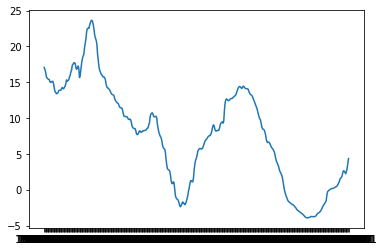

In [24]:
# x축이 너무 많다 범위를 줄이자
plt.plot(buy_price['Unnamed: 0'],total_index)

In [28]:
# 확인해보니 1986년도 부터 데이터가 존재한다 2010부터로 자르자 
buy_price['Unnamed: 0']

0      1986-01-01
1      1986-02-01
2      1986-03-01
3      1986-04-01
4      1986-05-01
          ...    
418    2020-11-01
419    2020-12-01
420    2021-01-01
421    2021-02-01
422    2021-03-01
Name: Unnamed: 0, Length: 423, dtype: object

In [33]:
date=buy_price['Unnamed: 0'][buy_price['Unnamed: 0']> '2019-12-01']
date

408    2020-01-01
409    2020-02-01
410    2020-03-01
411    2020-04-01
412    2020-05-01
413    2020-06-01
414    2020-07-01
415    2020-08-01
416    2020-09-01
417    2020-10-01
418    2020-11-01
419    2020-12-01
420    2021-01-01
421    2021-02-01
422    2021-03-01
Name: Unnamed: 0, dtype: object

In [34]:
total_index[408:]

408    0.882
409    1.078
410    1.466
411    1.620
412    1.698
413    1.919
414    2.380
415    2.654
416    2.603
417    2.460
418    2.239
419    2.543
420    2.953
421    3.645
422    4.360
Name: 총지수[2019.01=100], dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

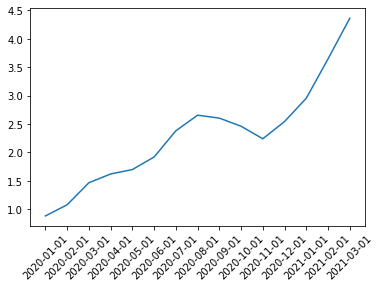

In [36]:
# x축 레이블이 겹쳐서 45도 회전을 주었다. 
plt.plot(date,total_index[408:])
plt.xticks(rotation = 45)

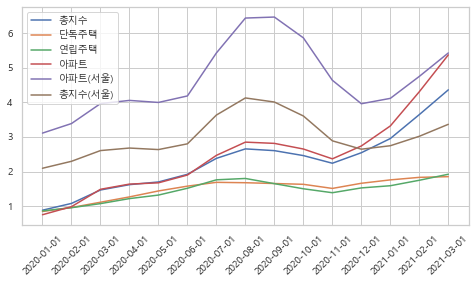

In [48]:
fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 

ax.plot(date,total_index[408:], label="총지수")  # line plot
ax.plot(date,house_index[408:], label="단독주택")  
ax.plot(date,rowhouse_index[408:], label="연립주택")  
ax.plot(date,apartment_index[408:], label="아파트")  
ax.plot(date,apartment_index_seoul[408:], label="아파트(서울)")  
ax.plot(date,total_index_seoul[408:], label="총지수(서울)")  

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.legend()

In [57]:
#  상승률 비교
# 월별 평균 지수를 연초 시초가로 나눔
total_index_rate = np.array(total_index[408:])/total_index[408] - 1 
house_index_rate = np.array(house_index[408:])/house_index[408] - 1 
rowhouse_index_rate = np.array(rowhouse_index[408:])/rowhouse_index[408] - 1 
apartment_index_rate = np.array(apartment_index[408:])/apartment_index[408] - 1 
apartment_index_seoul_rate = np.array(apartment_index_seoul[408:])/apartment_index_seoul[408] - 1 
total_index_seoul_rate = np.array(total_index_seoul[408:])/total_index_seoul[408] - 1 

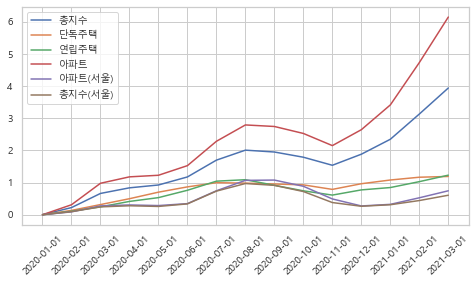

In [58]:
# 2020년 1월 1일을 기준으로 표준화

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 

ax.plot(date,total_index_rate, label="총지수")  # line plot
ax.plot(date,house_index_rate, label="단독주택")  
ax.plot(date,rowhouse_index_rate, label="연립주택")  
ax.plot(date,apartment_index_rate, label="아파트")  
ax.plot(date,apartment_index_seoul_rate, label="아파트(서울)")  
ax.plot(date,total_index_seoul_rate, label="총지수(서울)")  

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.legend()

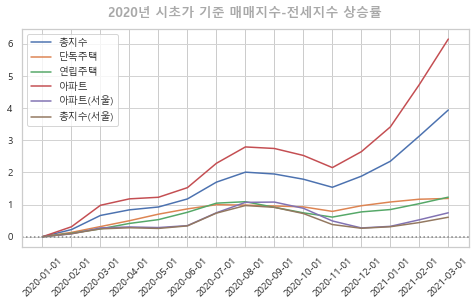

In [62]:
# 2020년 1월 1일을 기준으로 표준화

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 

ax.plot(date,total_index_rate, label="총지수")  # line plot
ax.plot(date,house_index_rate, label="단독주택")  
ax.plot(date,rowhouse_index_rate, label="연립주택")  
ax.plot(date,apartment_index_rate, label="아파트")  
ax.plot(date,apartment_index_seoul_rate, label="아파트(서울)")  
ax.plot(date,total_index_seoul_rate, label="총지수(서울)")  

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.set_title("2020년 시초가 기준 매매지수-전세지수 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="gray", ls=":")
ax.legend()

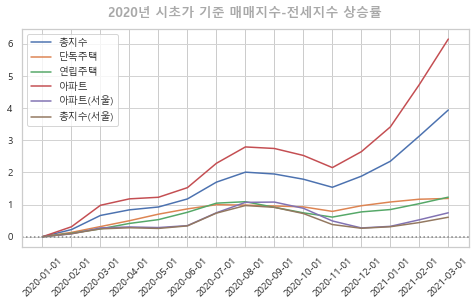

In [63]:
fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용
# 매매지수에서 전세지수를 뺀 값 

ax.plot(date,total_index_rate, label="총지수")  # line plot
ax.plot(date,house_index_rate, label="단독주택")  
ax.plot(date,rowhouse_index_rate, label="연립주택")  
ax.plot(date,apartment_index_rate, label="아파트")  
ax.plot(date,apartment_index_seoul_rate, label="아파트(서울)")  
ax.plot(date,total_index_seoul_rate, label="총지수(서울)")  

sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style="whitegrid",
        font_scale=0.9)
plt.xticks(rotation = 45)

ax.set_title("2020년 시초가 기준 매매지수-전세지수 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)
ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="gray", ls=":")
ax.legend()

# 매매가격이 크게 오른 곳

# 갭투자하기 좋은 곳